We are trying to create a game that will most likely be succesfull. The two major questions we have are:
- Which genre will grow the most in the next 10 years?
- Which publisher will sell the most in the next 10 years?

We also identified that some publishers are bigger on certain genres, which could affect our analysis.

In [133]:
#Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
#Load Dataset
file = "vgsales.csv"
df = pd.read_csv(file)
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Exploratory Analysis

In [87]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<AxesSubplot:>

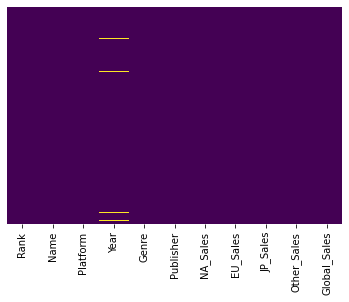

In [22]:
#checking where are the NA values :)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [149]:
publishercount = pd.DataFrame(df.groupby('Publisher').size().reset_index(name='count'))

In [150]:
publishercount.sort_values("count", ascending=False)

,Publisher,count
138,Electronic Arts,1351
21,Activision,975
347,Namco Bandai Games,932
525,Ubisoft,921
275,Konami Digital Entertainment,832
...,...,...
403,Playmates,1
404,Playmore,1
405,Plenty,1
406,Pony Canyon,1


In [158]:
#Publisher,count of games and average sales

publisheravgsales = pd.DataFrame(df.groupby(['Publisher', 'Global_Sales'], as_index=False).mean().groupby('Publisher')['Global_Sales'].mean())
publisher = pd.merge(publishercount, publisheravgsales, on='Publisher').sort_values('count', ascending=False)
publisher = publisher.rename(columns={'Global_Sales':'Global_Avg_Sales'})
publisher.head()

,Publisher,count,Global_Avg_Sales
138,Electronic Arts,1351,1.888149
21,Activision,975,2.217222
347,Namco Bandai Games,932,0.905669
525,Ubisoft,921,1.527181
275,Konami Digital Entertainment,832,1.082014


<BarContainer object of 578 artists>

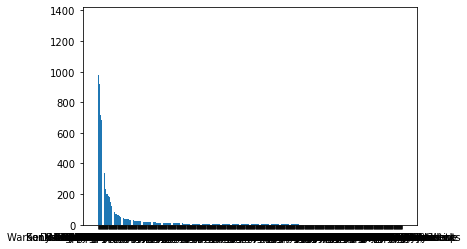

In [160]:
plt.bar(publisher['Publisher'], publisher['count'])

In [147]:
genrecount = pd.DataFrame(df.groupby('Genre').size().reset_index(name='count'))

In [139]:
genrecount.sort_values("count", ascending=False)

,Genre,count
0,Action,3316
10,Sports,2346
3,Misc,1739
7,Role-Playing,1488
8,Shooter,1310
1,Adventure,1286
6,Racing,1249
4,Platform,886
9,Simulation,867
2,Fighting,848


In [157]:
#Genre, count of games and average sales

genreavgsales = pd.DataFrame(df.groupby(['Genre', 'Global_Sales'], as_index=False).mean().groupby('Genre')['Global_Sales'].mean())
genre = pd.merge(genrecount, genreavgsales, on='Genre').sort_values('count', ascending=False)
genre = genre.rename(columns={'Global_Sales':'Global_Avg_Sales'})
genre.head()

,Genre,count,Global_Avg_Sales
0,Action,3316,2.485123
10,Sports,2346,2.339084
3,Misc,1739,2.056982
7,Role-Playing,1488,2.415244
8,Shooter,1310,2.554741


<BarContainer object of 12 artists>

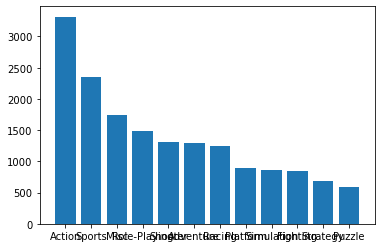

In [163]:
plt.bar(genre['Genre'], genre['count'])

In [152]:
platformcount = pd.DataFrame(df.groupby('Platform').size().reset_index(name='count'))
platformcount.sort_values('count',ascending=False)

,Platform,count
4,DS,2163
16,PS2,2161
17,PS3,1329
26,Wii,1325
28,X360,1265
19,PSP,1213
15,PS,1196
13,PC,960
29,XB,824
6,GBA,822


In [156]:
#Platform, count of games and average sales

platformavgsales = pd.DataFrame(df.groupby(['Platform', 'Global_Sales'], as_index=False).mean().groupby('Platform')['Global_Sales'].mean())
platform = pd.merge(platformcount, platformavgsales, on='Platform').sort_values('count', ascending=False)
platform = platform.rename(columns={'Global_Sales':'Global_Avg_Sales'})
platform.head()

,Platform,count,Global_Avg_Sales
4,DS,2163,2.317295
16,PS2,2161,2.134000
17,PS3,1329,2.172539
26,Wii,1325,2.861416
28,X360,1265,2.310345


<BarContainer object of 31 artists>

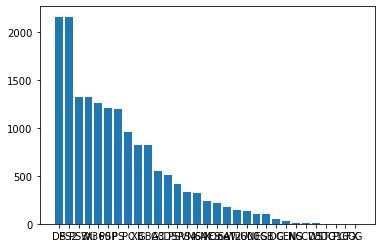

In [ ]:
plt.bar(platform['Platform'], platform['count'])

We need to cut the years since most consoles are not releasing any games anymore
- Which years should we try?
- Which consoles still released games the past two years? Cut data based on last year released?

In [4]:
#Biggest genre growth - ARIMA

In [5]:
#Biggest publisher growth - ARIMA